In [12]:
import pandas as pd
import numpy as np
# Read the HTML table
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
table = pd.read_html(url)[12]


In [13]:
# Display the first few rows of the table
print(table.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [14]:
# Get the shape of the dataframe
print(table.shape)

(28, 9)


In [15]:
# Replace missing values with NaN
table = table.replace('—', np.nan)
print(table)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [20]:
# Get the data types of each column
print(table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [28]:
# Convert non-numeric columns to numeric
num_table = table.iloc[:, :-2]
num_table = num_table.assign(col1=table.iloc[:, -2].astype(float))
num_table = num_table.assign(col2=table.iloc[:, -1].astype(float))
column_mapping = {8: '2014', 9: '2019'}
num_table.rename(columns=column_mapping, inplace=True)


print(num_table.select_dtypes(include=['number']))

     1950   1960   1970  1990  2000  2012   col1   col2
0   230.0  206.0  160.0   130    73   126    NaN    NaN
1   224.0  192.0  142.0   124    84   112  109.0   76.0
2   247.0  250.0  179.0   153   112   148  141.0  101.0
3   204.0  204.0  151.0   123    71   112  111.0   71.0
4   271.0  214.0  140.0   109    61    98   82.0    NaN
5   261.0  223.0  159.0   129    89   122  120.0   79.0
6   314.0  273.0  207.0   168   115   151  146.0  104.0
7   219.0  197.0  150.0   124    71   106  106.0   68.0
8   243.0  248.0  182.0   155   103   124  122.0   88.0
9   204.0  189.0  156.0   123    73   122  121.0   80.0
10  216.0  171.0  145.0   126    79   110  108.0   68.0
11  262.0  235.0  144.0   116    62    96   51.0    NaN
12  234.0  240.0  171.0   140    91   119  119.0   87.0
13  211.0  194.0  155.0   137    80   115  112.0   71.0
14  241.0  192.0  148.0   126    80   127  123.0   88.0
15  186.0  163.0  131.0   118    70    99  100.0   65.0
16  269.0  267.0  193.0   158   118   159  148.0

In [29]:
# Calculate the percentage of missing values in each column

missing_percentage = num_table.isnull().sum() / num_table.isnull().count() * 100
print(missing_percentage)

Регіон     0.000000
1950       7.407407
1960       3.703704
1970       3.703704
1990       0.000000
2000       0.000000
2012       0.000000
col1       7.407407
col2      14.814815
dtype: float64


In [33]:
# Remove the last row of the table
num_table = num_table[:-1]
print(num_table)

     1960   1970  1990  2000  2012    col1        col2
0   206.0  160.0   130    73   126  111.44   80.173913
1   192.0  142.0   124    84   112  109.00   76.000000
2   250.0  179.0   153   112   148  141.00  101.000000
3   204.0  151.0   123    71   112  111.00   71.000000
4   214.0  140.0   109    61    98   82.00   80.173913
5   223.0  159.0   129    89   122  120.00   79.000000
6   273.0  207.0   168   115   151  146.00  104.000000
7   197.0  150.0   124    71   106  106.00   68.000000
8   248.0  182.0   155   103   124  122.00   88.000000
9   189.0  156.0   123    73   122  121.00   80.000000
10  171.0  145.0   126    79   110  108.00   68.000000
11  235.0  144.0   116    62    96   51.00   80.173913
12  240.0  171.0   140    91   119  119.00   87.000000
13  194.0  155.0   137    80   115  112.00   71.000000
14  192.0  148.0   126    80   127  123.00   88.000000
15  163.0  131.0   118    70    99  100.00   65.000000
16  267.0  193.0   158   118   159  148.00  107.000000
17  184.0 

In [30]:
# Fill missing values with the mean of each column
num_table = num_table.iloc[:, 2:].fillna(num_table.select_dtypes(include=['number']).mean())
print(num_table)

          1960   1970  1990  2000  2012    col1        col2
0   206.000000  160.0   130    73   126  111.44   80.173913
1   192.000000  142.0   124    84   112  109.00   76.000000
2   250.000000  179.0   153   112   148  141.00  101.000000
3   204.000000  151.0   123    71   112  111.00   71.000000
4   214.000000  140.0   109    61    98   82.00   80.173913
5   223.000000  159.0   129    89   122  120.00   79.000000
6   273.000000  207.0   168   115   151  146.00  104.000000
7   197.000000  150.0   124    71   106  106.00   68.000000
8   248.000000  182.0   155   103   124  122.00   88.000000
9   189.000000  156.0   123    73   122  121.00   80.000000
10  171.000000  145.0   126    79   110  108.00   68.000000
11  235.000000  144.0   116    62    96   51.00   80.173913
12  240.000000  171.0   140    91   119  119.00   87.000000
13  194.000000  155.0   137    80   115  112.00   71.000000
14  192.000000  148.0   126    80   127  123.00   88.000000
15  163.000000  131.0   118    70    99 

In [32]:
# Get the regions with a higher birth rate than the average in 2019

above_average_2019 = num_table[num_table['col2'] > num_table['col2'].mean()]
print(above_average_2019)

     1960   1970  1990  2000  2012   col1   col2
2   250.0  179.0   153   112   148  141.0  101.0
6   273.0  207.0   168   115   151  146.0  104.0
8   248.0  182.0   155   103   124  122.0   88.0
12  240.0  171.0   140    91   119  119.0   87.0
14  192.0  148.0   126    80   127  123.0   88.0
16  267.0  193.0   158   118   159  148.0  107.0
20  214.0  166.0   143    85   117  115.0   81.0
23  218.0  170.0   148   101   128  129.0   92.0
25  174.0  159.0   120    73   120  121.0  110.0


In [34]:
# Find the region with the highest birth rate in 2014
highest_2014 = num_table['col1'].idxmax()
print(highest_2014)


16


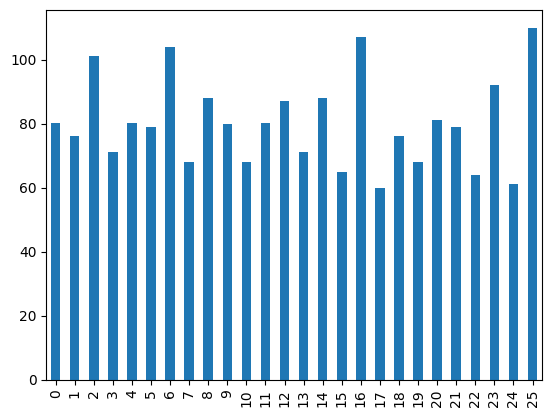

In [35]:
# Create a bar chart of the birth rate in 2019
import matplotlib.pyplot as plt
num_table['col2'].plot(kind='bar')
plt.show()